In [ ]:
# Get open ML
!pip install openml

In [ ]:
import openml
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.tree as tree
import matplotlib.pyplot as plt

In [ ]:
# Get data
dataset = openml.datasets.get_dataset(42890)

# Storing the data
eeg, *_ = dataset.get_data()

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [ ]:
eeg.head(60)

In [ ]:
eeg.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


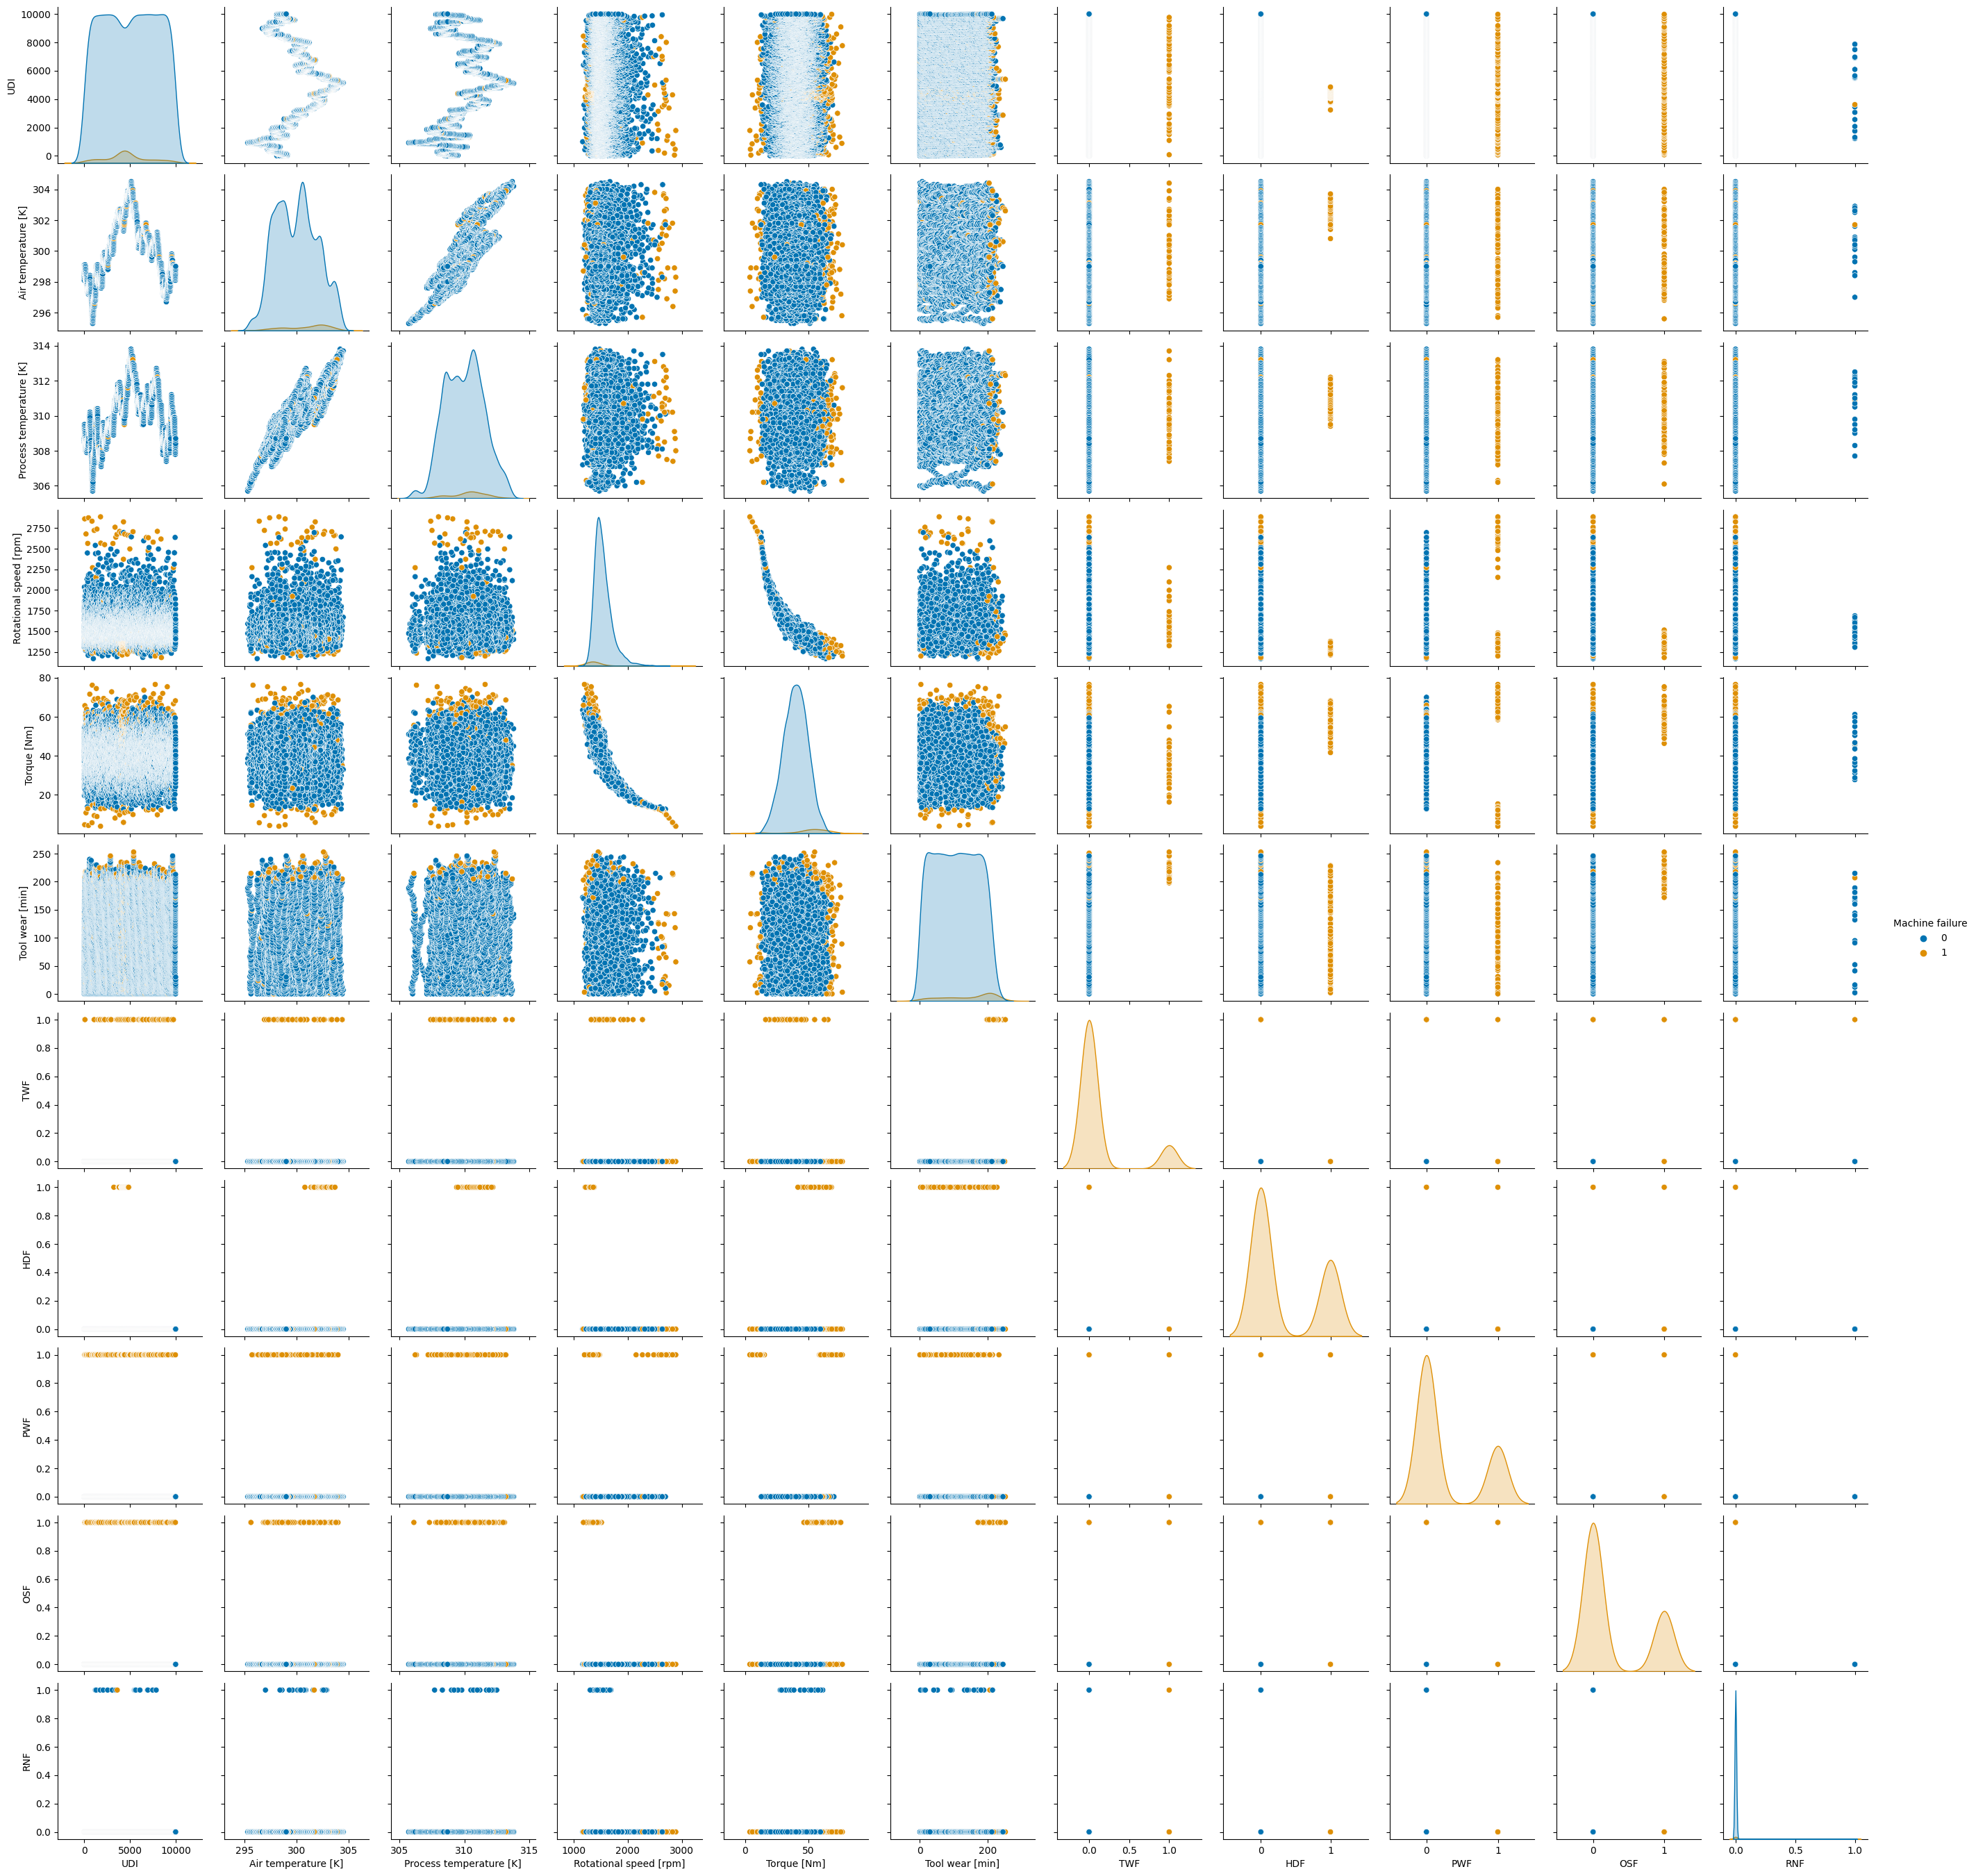

In [ ]:
sns.pairplot(eeg, hue='Machine failure', palette='colorblind')

In [ ]:
target_sort = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

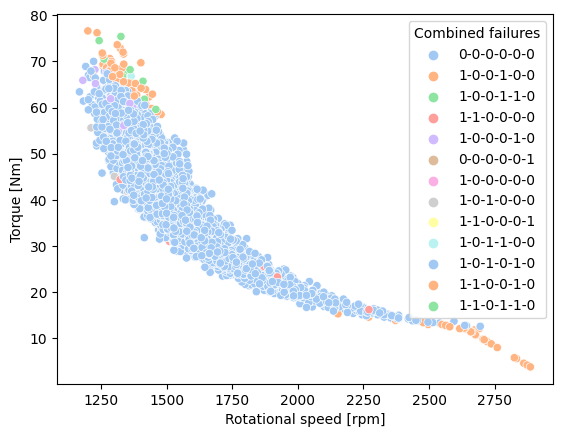

In [ ]:
# Create a combined col
eeg['Combined failures'] = eeg['Machine failure'].astype(str) + "-" + eeg['TWF'].astype(str) + "-" + eeg['HDF'].astype(str) + "-" + eeg['PWF'].astype(str) + "-" + eeg['OSF'].astype(str) + "-" + eeg['RNF'].astype(str)


# Plotting the other way
sns.scatterplot(data=eeg, x='Rotational speed [rpm]', y='Torque [Nm]',
                hue='Combined failures', palette='pastel')

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

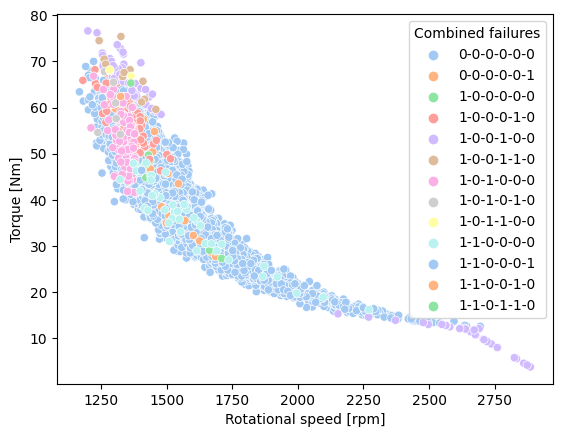

In [ ]:
# Graph torque by rotational speed target failure
# Colour by types of failure

# Create a combined col
eeg['Combined failures'] = eeg['Machine failure'].astype(str) + "-" + eeg['TWF'].astype(str) + "-" + eeg['HDF'].astype(str) + "-" + eeg['PWF'].astype(str) + "-" + eeg['OSF'].astype(str) + "-" + eeg['RNF'].astype(str)

eeg = eeg.sort_values(by=['Combined failures'], ascending=True)

# Plotting the other way
sns.scatterplot(data=eeg, x='Rotational speed [rpm]', y='Torque [Nm]',
                hue='Combined failures', palette='pastel')


<Axes: xlabel='Tool wear [min]', ylabel='Torque [Nm]'>

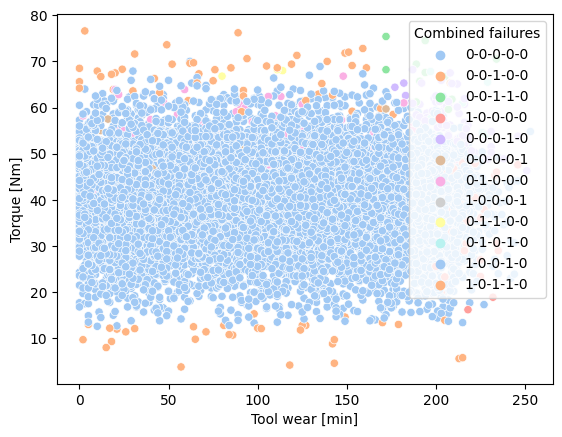

In [ ]:
# Graph torque by rotational speed target failure
# Colour by types of failure

# Plotting the other way
sns.scatterplot(data=eeg, x='Tool wear [min]', y='Torque [Nm]',
                hue='Combined failures', palette='pastel')

In [ ]:
eeg.head(50)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Combined failures
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0-0-0-0-0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0-0-0-0-0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0-0-0-0-0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0-0-0-0-0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0-0-0-0-0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0,0-0-0-0-0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0,0-0-0-0-0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0,0-0-0-0-0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0,0-0-0-0-0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0,0-0-0-0-0
